In [2]:

import sys
import os
sys.path.append("/".join(os.getcwd().split("/")[:-2]))

from utils.plot import plot_curves
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
import numpy as np
from numpy import ndarray
from typing import List
from acquire_data import acquire_curves

plt.ioff()


In [3]:
FIGURE_PATH = "../thesis/figures/experiments/"
COLORS = ["C" + str(idx) for idx in range(10)]

SCORE_LIMITS = [-0.6, 0.1]
EPISODE_LIMITS = [0, 450]

RECONSTRUCTION_LIMITS = [1e-2, 1]
KL_LIMITS = [0.0001, 1000]
IMITATION_LIMITS = [0, 3]

In [4]:
from typing import Tuple
from matplotlib.axes import Axes


def get_default_color(idx: int):
    return COLORS[idx % len(COLORS)]


def get_max_len(arrays: List[ndarray]) -> int:
    lens = [len(array) for array in arrays]
    return max(lens)

def plot_experiment_ends(
    ax: Axes,
    data: List[ndarray],
    linestyle: str = ":",
    color: str = "k",
    alpha: float = 1,
) -> Axes:
    lens = [len(d) for d in data]
    x = data[np.argmax(lens)][:, 0]

    y = ax.get_ylim()
    for idx, d in enumerate(data):
        x = data[idx][-1, 0]
        ax.plot([x, x], y, color=color, linestyle=linestyle, alpha=alpha)

    return ax


def plot_vae_comparison(
    subdir: str,
    ns_joints: List[int],
    latent_dims: List[int],
    key: str,
    y_lim: Tuple[float, float],
    log_scale: bool = False,
    linestyle: str = "-",
    fig=None,
    ax=None,
    std: bool = True,
    label_prefix: str = ""
):
    for idx, (n_joints, latent_dim) in enumerate(zip(ns_joints, latent_dims)):
        prefix = f"{n_joints}_{latent_dim}_"
        data = acquire_curves(subdir, prefix, key)
        color = get_default_color(idx)
        fig, ax = plot_curves(
            curves=data,
            color=color,
            legend=True,
            grid=True,
            log_scale=log_scale,
            label=f"{label_prefix} {n_joints}_{latent_dim}",
            fig=fig,
            ax=ax,
            linestyle=linestyle,
            std=std,
        )
        ax.set_ylim(y_lim)
        ax = plot_experiment_ends(
            ax=ax, data=data, linestyle=":", color=color, alpha=0.3
        )
    ax.grid(visible=True)
    ax.set_xlabel("step")
    ax.set_ylabel(key.split("/")[-1])
    ax.set_title(key)

    return fig, ax


def plot_supervised_comparison(
    subdir: str,
    ns_joints: List[int],
    key: str,
    y_lim: Tuple[float, float],
    log_scale: bool = False,
    linestyle: str = "-",
    fig=None,
    ax=None,
    std: bool = True,
):
    for idx, n_joints in enumerate(ns_joints):
        prefix = f"{n_joints}_"
        data = acquire_curves(subdir, prefix, key)
        color = get_default_color(idx)
        fig, ax = plot_curves(
            curves=data,
            color=color,
            legend=True,
            grid=True,
            log_scale=log_scale,
            label=f"{n_joints}",
            fig=fig,
            ax=ax,
            linestyle=linestyle,
            std=std,
        )
        ax.set_ylim(y_lim)
        ax = plot_experiment_ends(
            ax=ax, data=data, linestyle=":", color=color, alpha=0.3
        )
    ax.grid(visible=True)
    ax.set_xlabel("step")
    ax.set_ylabel(key.split("/")[-1])
    ax.set_title(key)

    return fig, ax


def plot_sac_comparison(
    subdir: str, ns_joints: List[int], key: str, y_lim: Tuple[float, float], label: str = "", color: str = "", fig = None, ax = None
):
    for idx, n_joints in enumerate(ns_joints):
        prefix = f"{n_joints}_"
        data = acquire_curves(subdir, prefix, key)
        l = label if len(label) else prefix[:-1]
        fig, ax = plot_curves(
            curves=data,
            color=color if len(color) else get_default_color(idx),
            legend=True,
            label=l,
            fig=fig,
            ax=ax,
        )
        ax.set_ylim(*y_lim)
        ax = plot_experiment_ends(
            ax=ax, data=data, linestyle=":", color=get_default_color(idx), alpha=0.3
        )
    # ax.grid()
    ax.set_xlabel("step")
    ax.set_title(key)
    ax.set_ylabel(key.split("/")[-1])
    ax.grid(visible=True)

    return fig, ax


def plot_sac_latent_dim_difference(n_joints: int, latent_dims: List[int], key: str):
    fig = None
    ax = None
    for idx, latent_dim in enumerate(latent_dims):
        prefix = f"{n_joints}_"
        data = acquire_curves(f"sac/latent_actor_{latent_dim}", prefix, key)
        fig, ax = plot_curves(
            curves=data,
            color=get_default_color(idx),
            grid=True,
            label=str(latent_dim),
            fig=fig,
            ax=ax,
        )
        ax = plot_experiment_ends(
            ax=ax, data=data, linestyle=":", color=get_default_color(idx), alpha=0.3
        )
    ax.grid(visible=True)
    ax.set_title(key)
    ax.set_xlabel("step")
    ax.set_ylabel(key.split("/")[-1])
    ax.legend()

    return fig, ax


def plot_baseline_comparison(
    n_joints: int, latent_dims: List[int], key: str, y_lim: Tuple[float, float]
):
    fig, ax = plot_sac_comparison(
        subdir="sac/baseline",
        ns_joints=[n_joints],
        key=key,
        y_lim=y_lim,
        label="baseline",
        color=get_default_color(7)
    )
    for idx, latent_dim in enumerate(latent_dims):
        prefix = f"{n_joints}_"
        data = acquire_curves(f"sac/latent_actor_{latent_dim}", prefix, key)
        color = get_default_color(idx)
        fig, ax = plot_curves(
            curves=data,
            color=color,
            grid=True,
            label=str(latent_dim),
            fig=fig,
            ax=ax,
        )
        ax = plot_experiment_ends(
            ax=ax, data=data, linestyle=":", color=color, alpha=0.3
        )
    ax.set_xlabel("step")
    ax.set_ylabel(key.split("/")[-1])
    ax.set_title(key + ", " + f"{n_joints = }")
    ax.grid(visible=True)
    ax.legend()

    return fig, ax

## Plot VAE Results

### Plot reconstruction loss

In [6]:
key = "VAE_val/distance_loss"
n_joints = [2, 5, 10, 15]
latent_dims = np.ones_like(n_joints)

latent_dim = 2
fig, ax = plot_vae_comparison(
    "vae/baseline",
    ns_joints=n_joints,
    latent_dims=(latent_dims * latent_dim).tolist(),
    key=key,
    log_scale=True,
    y_lim=RECONSTRUCTION_LIMITS,
)
fig.savefig(
    FIGURE_PATH + f"vae_comparison_latent_{latent_dim}_reconstruction_loss.png")

latent_dim = 4
fig, ax = plot_vae_comparison(
    "vae/baseline",
    ns_joints=n_joints,
    latent_dims=(latent_dims * latent_dim).tolist(),
    key=key,
    log_scale=True,
    y_lim=RECONSTRUCTION_LIMITS,
)
fig.savefig(
    FIGURE_PATH + f"vae_comparison_latent_{latent_dim}_reconstruction_loss.png")

latent_dim = 8
fig, ax = plot_vae_comparison(
    "vae/baseline",
    ns_joints=n_joints,
    latent_dims=(latent_dims * latent_dim).tolist(),
    key=key,
    log_scale=True,
    y_lim=RECONSTRUCTION_LIMITS,
)
fig.savefig(
    FIGURE_PATH + f"vae_comparison_latent_{latent_dim}_reconstruction_loss.png")

plt.ioff()

#### Plot kl divergence

In [7]:
key = "VAE_val/kl_loss"

latent_dim = 2
fig, ax = plot_vae_comparison(
    "vae/baseline",
    ns_joints=n_joints,
    latent_dims=(latent_dims * latent_dim).tolist(),
    key=key,
    log_scale=True,
    y_lim=KL_LIMITS,
)
fig.savefig(FIGURE_PATH + f"vae_comparison_latent_{latent_dim}_kl_loss.png")

latent_dim = 4
fig, ax = plot_vae_comparison(
    "vae/baseline",
    ns_joints=n_joints,
    latent_dims=(latent_dims * latent_dim).tolist(),
    key=key,
    log_scale=True,
    y_lim=KL_LIMITS,
)
fig.savefig(FIGURE_PATH + f"vae_comparison_latent_{latent_dim}_kl_loss.png")

latent_dim = 8
fig, ax = plot_vae_comparison(
    "vae/baseline",
    ns_joints=n_joints,
    latent_dims=(latent_dims * latent_dim).tolist(),
    key=key,
    log_scale=True,
    y_lim=KL_LIMITS,
)
fig.savefig(FIGURE_PATH + f"vae_comparison_latent_{latent_dim}_kl_loss.png")

plt.ioff()

### Plot latent dimension comparisons

### Reconstruction Loss

In [8]:
latent_dims = [2, 4, 8]
joints = np.ones_like(latent_dims)
key = "VAE_val/distance_loss"
save_str = str(latent_dims).strip("[]").replace(", ", "_")

n_joints = 2
fig, ax = plot_vae_comparison(
    "vae/baseline",
    ns_joints=(joints * n_joints).tolist(),
    latent_dims=latent_dims,
    key=key,
    log_scale=True,
    std=True,
    y_lim=RECONSTRUCTION_LIMITS
)
fig.savefig(FIGURE_PATH +
            f"vae_comparison_{n_joints}_latent_{save_str}_reconstruction_loss.png")

n_joints = 5
fig, ax = plot_vae_comparison(
    "vae/baseline",
    ns_joints=(joints * n_joints).tolist(),
    latent_dims=latent_dims,
    key=key,
    log_scale=True,
    std=True,
    y_lim=RECONSTRUCTION_LIMITS
)
fig.savefig(FIGURE_PATH +
            f"vae_comparison_{n_joints}_latent_{save_str}_reconstruction_loss.png")

n_joints = 10
fig, ax = plot_vae_comparison(
    "vae/baseline",
    ns_joints=(joints * n_joints).tolist(),
    latent_dims=latent_dims,
    key=key,
    log_scale=True,
    std=True,
    y_lim=RECONSTRUCTION_LIMITS
)
fig.savefig(FIGURE_PATH +
            f"vae_comparison_{n_joints}_latent_{save_str}_reconstruction_loss.png")

n_joints = 15
fig, ax = plot_vae_comparison(
    "vae/baseline",
    ns_joints=(joints * n_joints).tolist(),
    latent_dims=latent_dims,
    key=key,
    log_scale=True,
    std=True,
    y_lim=RECONSTRUCTION_LIMITS
)
fig.savefig(FIGURE_PATH +
            f"vae_comparison_{n_joints}_latent_{save_str}_reconstruction_loss.png")

plt.ioff()

### KL Loss

In [9]:
key = "VAE_val/kl_loss"
latent_dims = [2, 4, 8]
joints = np.ones_like(latent_dims)
save_str = str(latent_dims).strip("[]").replace(", ", "_")

n_joints = 2
fig, ax = plot_vae_comparison(
    "vae/baseline",
    ns_joints=(joints * n_joints).tolist(),
    latent_dims=latent_dims,
    key=key,
    log_scale=True,
    std=True,
    y_lim=KL_LIMITS
)
fig.savefig(
    FIGURE_PATH + f"vae_comparison_{n_joints}_latent_{save_str}_kl_loss.png")

n_joints = 5
fig, ax = plot_vae_comparison(
    "vae/baseline",
    ns_joints=(joints * n_joints).tolist(),
    latent_dims=latent_dims,
    key=key,
    log_scale=True,
    std=True,
    y_lim=KL_LIMITS

)
fig.savefig(
    FIGURE_PATH + f"vae_comparison_{n_joints}_latent_{save_str}_kl_loss.png")

n_joints = 10
fig, ax = plot_vae_comparison(
    "vae/baseline",
    ns_joints=(joints * n_joints).tolist(),
    latent_dims=latent_dims,
    key=key,
    log_scale=True,
    std=True,
    y_lim=KL_LIMITS

)
fig.savefig(
    FIGURE_PATH + f"vae_comparison_{n_joints}_latent_{save_str}_kl_loss.png")

n_joints = 15
fig, ax = plot_vae_comparison(
    "vae/baseline",
    ns_joints=(joints * n_joints).tolist(),
    latent_dims=latent_dims,
    key=key,
    log_scale=True,
    std=True,
    y_lim=KL_LIMITS

)
fig.savefig(
    FIGURE_PATH + f"vae_comparison_{n_joints}_latent_{save_str}_kl_loss.png")
plt.ioff()

### Plot stats from training with Imitation learning

In [11]:
n_joints = [2, 5, 10, 15]
latent_dims = 4 * np.ones_like(n_joints)


save_str = str(latent_dims).strip("[]").replace(", ", "_")
key = "VAE_val/distance_loss"
fig, ax = plot_vae_comparison(
    "vae/imitation",
    ns_joints=n_joints,
    latent_dims=latent_dims.tolist(),
    key=key,
    log_scale=True,
    std=True,
    y_lim=RECONSTRUCTION_LIMITS
)
fig.savefig(
    FIGURE_PATH + f"vae_comparison_imitation_{n_joints}_latent_{save_str}_distance_loss.png")

key = "VAE_val/imitation_loss"
save_str = str(latent_dims).strip("[]").replace(", ", "_")
fig, ax = plot_vae_comparison(
    "vae/imitation",
    ns_joints=n_joints,
    latent_dims=latent_dims.tolist(),
    key=key,
    log_scale=False,
    std=True,
    y_lim=IMITATION_LIMITS
)
fig.savefig(
    FIGURE_PATH + f"vae_comparison_imitation_{n_joints}_latent_{save_str}_imitation_loss.png")


key = "VAE_val/kl_loss"
save_str = str(latent_dims).strip("[]").replace(", ", "_")
fig, ax = plot_vae_comparison(
    "vae/imitation",
    ns_joints=n_joints,
    latent_dims=latent_dims.tolist(),
    key=key,
    log_scale=True,
    std=True,
    y_lim=KL_LIMITS
)
fig.savefig(
    FIGURE_PATH + f"vae_comparison_imitation_{n_joints}_latent_{save_str}_kl_loss.png")

plt.ioff()

## Plot Supervised Results

## results only on distance loss

In [10]:
key = "Regressor_val/distance_loss"
joints = [2, 5, 10, 15, 20]
save_str = str(latent_dims).strip("[]").replace(", ", "_")

n_joints = 2
fig, ax = plot_supervised_comparison(
    "supervised/dist_loss",
    ns_joints=joints,
    key=key,
    log_scale=True,
    std=True,
    y_lim=RECONSTRUCTION_LIMITS
)
fig.savefig(
    FIGURE_PATH + f"supervised_{n_joints}_distance_loss.png")

plt.ioff()


### invoke imitation loss

In [14]:
joints = [2, 5, 10]

key = "Regressor_val/distance_loss"
fig, ax = plot_supervised_comparison(
    subdir="supervised/imitation_loss",
    ns_joints=joints,
    key=key,
    log_scale=True,
    std=True,
    y_lim=RECONSTRUCTION_LIMITS
)
fig.savefig(
    FIGURE_PATH + f"supervised_imitation_{n_joints}_latent_{save_str}_distance_loss.png")


key = "Regressor_val/imitation_loss"
fig, ax = plot_supervised_comparison(
    subdir="supervised/imitation_loss",
    ns_joints=joints,
    key=key,
    log_scale=False,
    std=True,
    y_lim=IMITATION_LIMITS
)
fig.savefig(
    FIGURE_PATH + f"supervised_imitation_{n_joints}_latent_{save_str}_imitation_loss.png")



## Plot SAC Baseline experimental results

In [16]:

fig, _ = plot_sac_comparison(
    "sac/baseline", [2, 5, 10, 15, 20], "sac/mean_score", y_lim=SCORE_LIMITS)
fig.savefig(FIGURE_PATH + "sac_baseline_mean_score.png")
fig, _ = plot_sac_comparison(
    "sac/baseline", [2, 5, 10, 15, 20], "sac/episode_len", y_lim=EPISODE_LIMITS)
fig.savefig(FIGURE_PATH + "sac_baseline_episode_len.png")

plt.ioff()

### Plot results of training SAC with VAE Decoder and different latent dimensions 

In [13]:
latent_dim = 2
num_joints = [2, 5, 10, 15]
fig, _ = plot_sac_comparison(
    f"sac/latent_actor_{latent_dim}",
    num_joints,
    "sac/episode_len",
    y_lim=EPISODE_LIMITS,
)
fig.savefig(FIGURE_PATH + f"sac_latent_actor_{latent_dim}_episode_len.png")

fig, _ = plot_sac_comparison(
    f"sac/latent_actor_{latent_dim}", num_joints, "sac/mean_score", y_lim=SCORE_LIMITS
)
fig.savefig(FIGURE_PATH + f"sac_latent_actor_{latent_dim}_mean_score.png")

plt.ioff()

/home/uhrich/Bachelorthesis/utils/plot.py:39: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure()


In [17]:
latent_dim = 4
num_joints = [2, 5, 10, 15]
fig, _ = plot_sac_comparison(
    f"sac/latent_actor_{latent_dim}",
    num_joints,
    "sac/episode_len",
    y_lim=EPISODE_LIMITS,
)
fig.savefig(FIGURE_PATH + f"sac_latent_actor_{latent_dim}_episode_len.png")

fig, _ = plot_sac_comparison(
    f"sac/latent_actor_{latent_dim}", num_joints, "sac/mean_score", y_lim=SCORE_LIMITS
)
fig.savefig(FIGURE_PATH + f"sac_latent_actor_{latent_dim}_mean_score.png")

plt.ioff()

/home/uhrich/Bachelorthesis/utils/plot.py:39: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure()


In [18]:
latent_dim = 8
num_joints = [2, 5, 10, 15]
fig, _ = plot_sac_comparison(
    f"sac/latent_actor_{latent_dim}",
    num_joints,
    "sac/episode_len",
    y_lim=EPISODE_LIMITS,
)
fig.savefig(FIGURE_PATH + f"sac_latent_actor_{latent_dim}_episode_len.png")

fig, _ = plot_sac_comparison(
    f"sac/latent_actor_{latent_dim}",
    num_joints,
    "sac/mean_score",
    y_lim=SCORE_LIMITS,
)
fig.savefig(FIGURE_PATH + f"sac_latent_actor_{latent_dim}_mean_score.png")

plt.ioff()

### Plot action correlation for two joints

In [2]:
def create_inference_plots(checkpoint: str, sample_size: int, device: str = "cuda:0"):
    base_path = "../.."
    command = f"python -m rl sac inference --checkpoint {checkpoint} --device {device} --sample-size {sample_size}"
    result = os.system(f"cd {base_path} && {command}")

    # move plot to figures directory
    img_suffix = "_".join(checkpoint.split("/")[2:])
    copy_command = f"cp {base_path}/{checkpoint}/action_correlations.png ../thesis/figures/experiments/action_correlations_{img_suffix}.png"
    os.system(copy_command)
    copy_command = f"cp {base_path}/{checkpoint}/RL_Agent_Iterations.png ../thesis/figures/experiments/RL_Agent_Iterations_{img_suffix}.png"
    os.system(copy_command)
    copy_command = f"cp {base_path}/{checkpoint}/Minimal_distances.png ../thesis/figures/experiments/Minimal_distances_{img_suffix}.png"
    os.system(copy_command)
    copy_command = f"cp {base_path}/{checkpoint}/Minimal_distances_index.png ../thesis/figures/experiments/Minimal_distances_index_{img_suffix}.png"
    os.system(copy_command)
    

device = "cuda:0"
sample_size = 300

In [3]:
# BASELINE
checkpoint = "results/sac/baseline/2_1691621262/5000"
create_inference_plots(checkpoint, sample_size, device)
checkpoint = "results/sac/baseline/5_1691621331/5000"
create_inference_plots(checkpoint, sample_size, device)
checkpoint = "results/sac/baseline/10_1691618968/5000"
create_inference_plots(checkpoint, sample_size, device)
checkpoint = "results/sac/baseline/15_1691619106/5000"
create_inference_plots(checkpoint, sample_size, device)
checkpoint = "results/sac/baseline/20_1691619159/5000"
create_inference_plots(checkpoint, sample_size, device)

results/sac/baseline/2_1691621262


number of sampled actions: (32062, 2)
solved ratio: 0.7335640138408305
min distance mean:  0.0935139782611796


In [ ]:
# LATENT 2
checkpoint = "results/sac/latent_actor_2/2_1693146377/5000"
create_inference_plots(checkpoint, sample_size, device)
checkpoint = "results/sac/latent_actor_2/5_1693146402/5000"
create_inference_plots(checkpoint, sample_size, device)
checkpoint = "results/sac/latent_actor_2/10_1693146420/5000"
create_inference_plots(checkpoint, sample_size, device)
checkpoint = "results/sac/latent_actor_2/15_1693146466/5000"
create_inference_plots(checkpoint, sample_size, device)


In [11]:
# LATENT 4
# checkpoint = "results/sac/latent_actor_4/2_1693063115/5000"
# create_inference_plots(checkpoint, sample_size, device)
# checkpoint = "results/sac/latent_actor_4/5_1693063141/5000"
# create_inference_plots(checkpoint, sample_size, device)
# checkpoint = "results/sac/latent_actor_4/10_1691620301/5000"
# create_inference_plots(checkpoint, sample_size, device)
checkpoint = "results/sac/latent_actor_4/15_1691660318/5000"
create_inference_plots(checkpoint, sample_size, device)


results/sac/latent_actor_4/15_1691660318
use checkpoint for VAE at results/vae/baseline/15_4_1691628295/VAE_3845_val_loss_0.0519.pt


number of sampled actions: (113409, 15)


ERROR:root:Not possible to plot action distribution for 15


solved ratio: 0.04152249134948097
min distance mean:  3.891658726667956


In [10]:
# LATENT 8
# checkpoint = "results/sac/latent_actor_8/2_1691615359/3000"
# create_inference_plots(checkpoint, sample_size, device)
# checkpoint = "results/sac/latent_actor_8/5_1691612773/3000"
# create_inference_plots(checkpoint, sample_size, device)
# checkpoint = "results/sac/latent_actor_8/10_1691612526/3000"
# create_inference_plots(checkpoint, sample_size, device)
checkpoint = "results/sac/latent_actor_8/15_1691626460/3000"
create_inference_plots(checkpoint, sample_size, device)

results/sac/latent_actor_8/15_1691626460
use checkpoint for VAE at results/vae/baseline/15_8_1691618374/VAE_4760_val_loss_0.0635.pt


number of sampled actions: (111389, 15)


ERROR:root:Not possible to plot action distribution for 15


solved ratio: 0.058823529411764705
min distance mean:  4.2150161200665


In [5]:
# LATENT imitation
checkpoint = "results/sac/latent_imitation_4/2_1693269830/3000"
create_inference_plots(checkpoint, sample_size, device)
checkpoint = "results/sac/latent_imitation_4/5_1693269853/3000"
create_inference_plots(checkpoint, sample_size, device)
checkpoint = "results/sac/latent_imitation_4/10_1693858660/3000"
create_inference_plots(checkpoint, sample_size, device)
checkpoint = "results/sac/latent_imitation_4/15_1693860185/3000"
create_inference_plots(checkpoint, sample_size, device)

results/sac/latent_imitation_4/2_1693269830
use checkpoint for VAE at results/vae/imitation/2_4_1693269892/VAE_4745_val_loss_0.0143.pt


number of sampled actions: (17966, 2)
solved ratio: 0.8546712802768166
min distance mean:  0.08093271065706606
results/sac/latent_imitation_4/5_1693269853
use checkpoint for VAE at results/vae/imitation/5_4_1693259974/VAE_2200_val_loss_0.0359.pt


number of sampled actions: (23513, 5)


ERROR:root:Not possible to plot action distribution for 5


solved ratio: 0.8512110726643599
min distance mean:  0.09670603516387219
results/sac/latent_imitation_4/10_1693858660
use checkpoint for VAE at results/vae/imitation/10_4_1693282875/VAE_3040_val_loss_0.0574.pt


number of sampled actions: (77944, 10)


ERROR:root:Not possible to plot action distribution for 10


solved ratio: 0.4463667820069204
min distance mean:  0.4449327271509986
results/sac/latent_imitation_4/15_1693860185
use checkpoint for VAE at results/vae/imitation/15_4_1693497146/VAE_4860_val_loss_0.0800.pt


number of sampled actions: (108733, 15)


ERROR:root:Not possible to plot action distribution for 15


solved ratio: 0.11418685121107267
min distance mean:  2.0060765628235697


In [3]:
# Supervised distance
checkpoint = "results/sac/supervised_dist_loss/2_1693272467/3000"
create_inference_plots(checkpoint, sample_size, device)
checkpoint = "results/sac/supervised_dist_loss/5_1693272399/3000"
create_inference_plots(checkpoint, sample_size, device)
checkpoint = "results/sac/supervised_dist_loss/10_1694259480/3000"
create_inference_plots(checkpoint, sample_size, device)

results/sac/supervised_dist_loss/2_1693272467
use checkpoint for supervised at results/supervised/dist_loss/2_1693261914/Regressor_2935_val_loss_0.0128.pt


number of sampled actions: (44856, 2)
solved ratio: 0.6193771626297578
min distance mean:  0.10803726187531897
results/sac/supervised_dist_loss/5_1693272399
use checkpoint for supervised at results/supervised/dist_loss/5_1693258893/Regressor_2675_val_loss_0.0145.pt


number of sampled actions: (52980, 5)


ERROR:root:Not possible to plot action distribution for 5


solved ratio: 0.6020761245674741
min distance mean:  0.1971786432151791
results/sac/supervised_dist_loss/10_1694259480
use checkpoint for supervised at results/supervised/dist_loss/10_1693259719/Regressor_2630_val_loss_0.0244.pt


number of sampled actions: (70208, 10)


ERROR:root:Not possible to plot action distribution for 10


solved ratio: 0.5294117647058824
min distance mean:  0.6366072292103377


In [4]:
# Supervised imitation
checkpoint = "results/sac/supervised_imitation/2_1693487256/3000"
create_inference_plots(checkpoint, sample_size, device)
checkpoint = "results/sac/supervised_imitation/5_1693487345/3000"
create_inference_plots(checkpoint, sample_size, device)
checkpoint = "results/sac/supervised_imitation/10_1693487396/3000"
create_inference_plots(checkpoint, sample_size, device)

results/sac/supervised_imitation/2_1693487256
use checkpoint for supervised at results/supervised/imitation_loss/2_1693275778/Regressor_2910_val_loss_1.0671.pt


number of sampled actions: (94008, 2)
solved ratio: 0.1903114186851211
min distance mean:  0.371644606868931
results/sac/supervised_imitation/5_1693487345
use checkpoint for supervised at results/supervised/imitation_loss/5_1693274557/Regressor_2895_val_loss_1.1609.pt


number of sampled actions: (97028, 5)


ERROR:root:Not possible to plot action distribution for 5


solved ratio: 0.24567474048442905
min distance mean:  0.33754735532118213
results/sac/supervised_imitation/10_1693487396
use checkpoint for supervised at results/supervised/imitation_loss/10_1693318960/Regressor_2675_val_loss_2.0594.pt


number of sampled actions: (103880, 10)


ERROR:root:Not possible to plot action distribution for 10


solved ratio: 0.20761245674740483
min distance mean:  0.7104284861069134


## Performance comparison between baseline and latent model

In [19]:
latent_dims = [2, 4, 8]

n_joints = 2
fig, _ = plot_baseline_comparison(
    n_joints, latent_dims, "sac/mean_score", y_lim=SCORE_LIMITS
)
fig.savefig(FIGURE_PATH + f"sac_latent_comp_{n_joints}_vae_mean_score.png")
fig, _ = plot_baseline_comparison(
    n_joints, latent_dims, "sac/episode_len", y_lim=EPISODE_LIMITS
)
fig.savefig(FIGURE_PATH + f"sac_latent_comp_{n_joints}_vae_episode_len.png")

n_joints = 5
fig, _ = plot_baseline_comparison(
    n_joints, latent_dims, "sac/mean_score", y_lim=SCORE_LIMITS
)
fig.savefig(FIGURE_PATH + f"sac_latent_comp_{n_joints}_vae_mean_score.png")
fig, _ = plot_baseline_comparison(
    n_joints, latent_dims, "sac/episode_len", y_lim=EPISODE_LIMITS
)
fig.savefig(FIGURE_PATH + f"sac_latent_comp_{n_joints}_vae_episode_len.png")

n_joints = 10
fig, _ = plot_baseline_comparison(
    n_joints, latent_dims, "sac/mean_score", y_lim=SCORE_LIMITS
)
fig.savefig(FIGURE_PATH + f"sac_latent_comp_{n_joints}_vae_mean_score.png")
fig, _ = plot_baseline_comparison(
    n_joints, latent_dims, "sac/episode_len", y_lim=EPISODE_LIMITS
)
fig.savefig(FIGURE_PATH + f"sac_latent_comp_{n_joints}_vae_episode_len.png")

n_joints = 15
fig, _ = plot_baseline_comparison(
    n_joints, latent_dims, "sac/mean_score", y_lim=SCORE_LIMITS
)
fig.savefig(FIGURE_PATH + f"sac_latent_comp_{n_joints}_vae_mean_score.png")
fig, _ = plot_baseline_comparison(
    n_joints, latent_dims, "sac/episode_len", y_lim=EPISODE_LIMITS
)
fig.savefig(FIGURE_PATH + f"sac_latent_comp_{n_joints}_vae_episode_len.png")

plt.ioff()

## Plot SAC + Supervsied

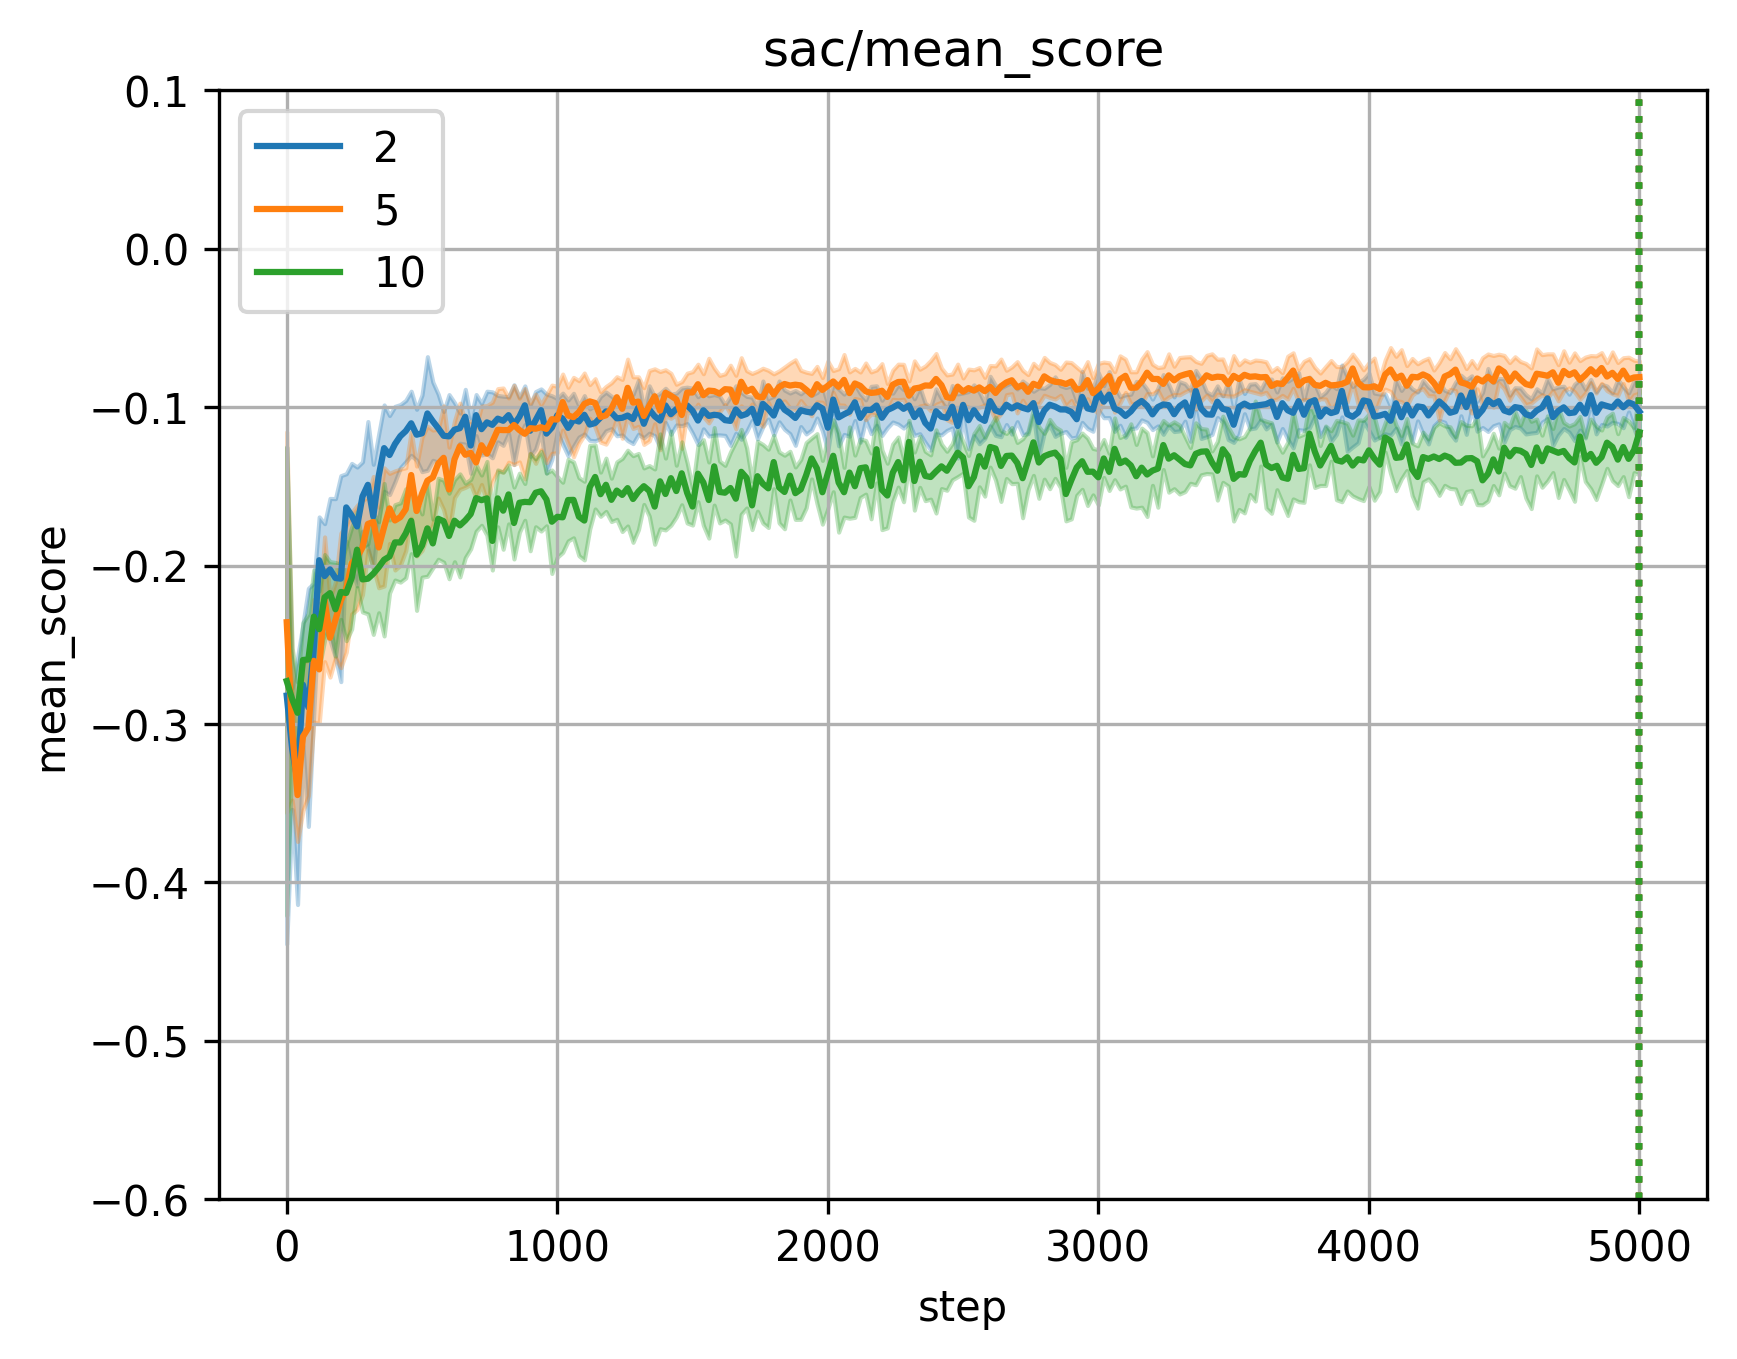

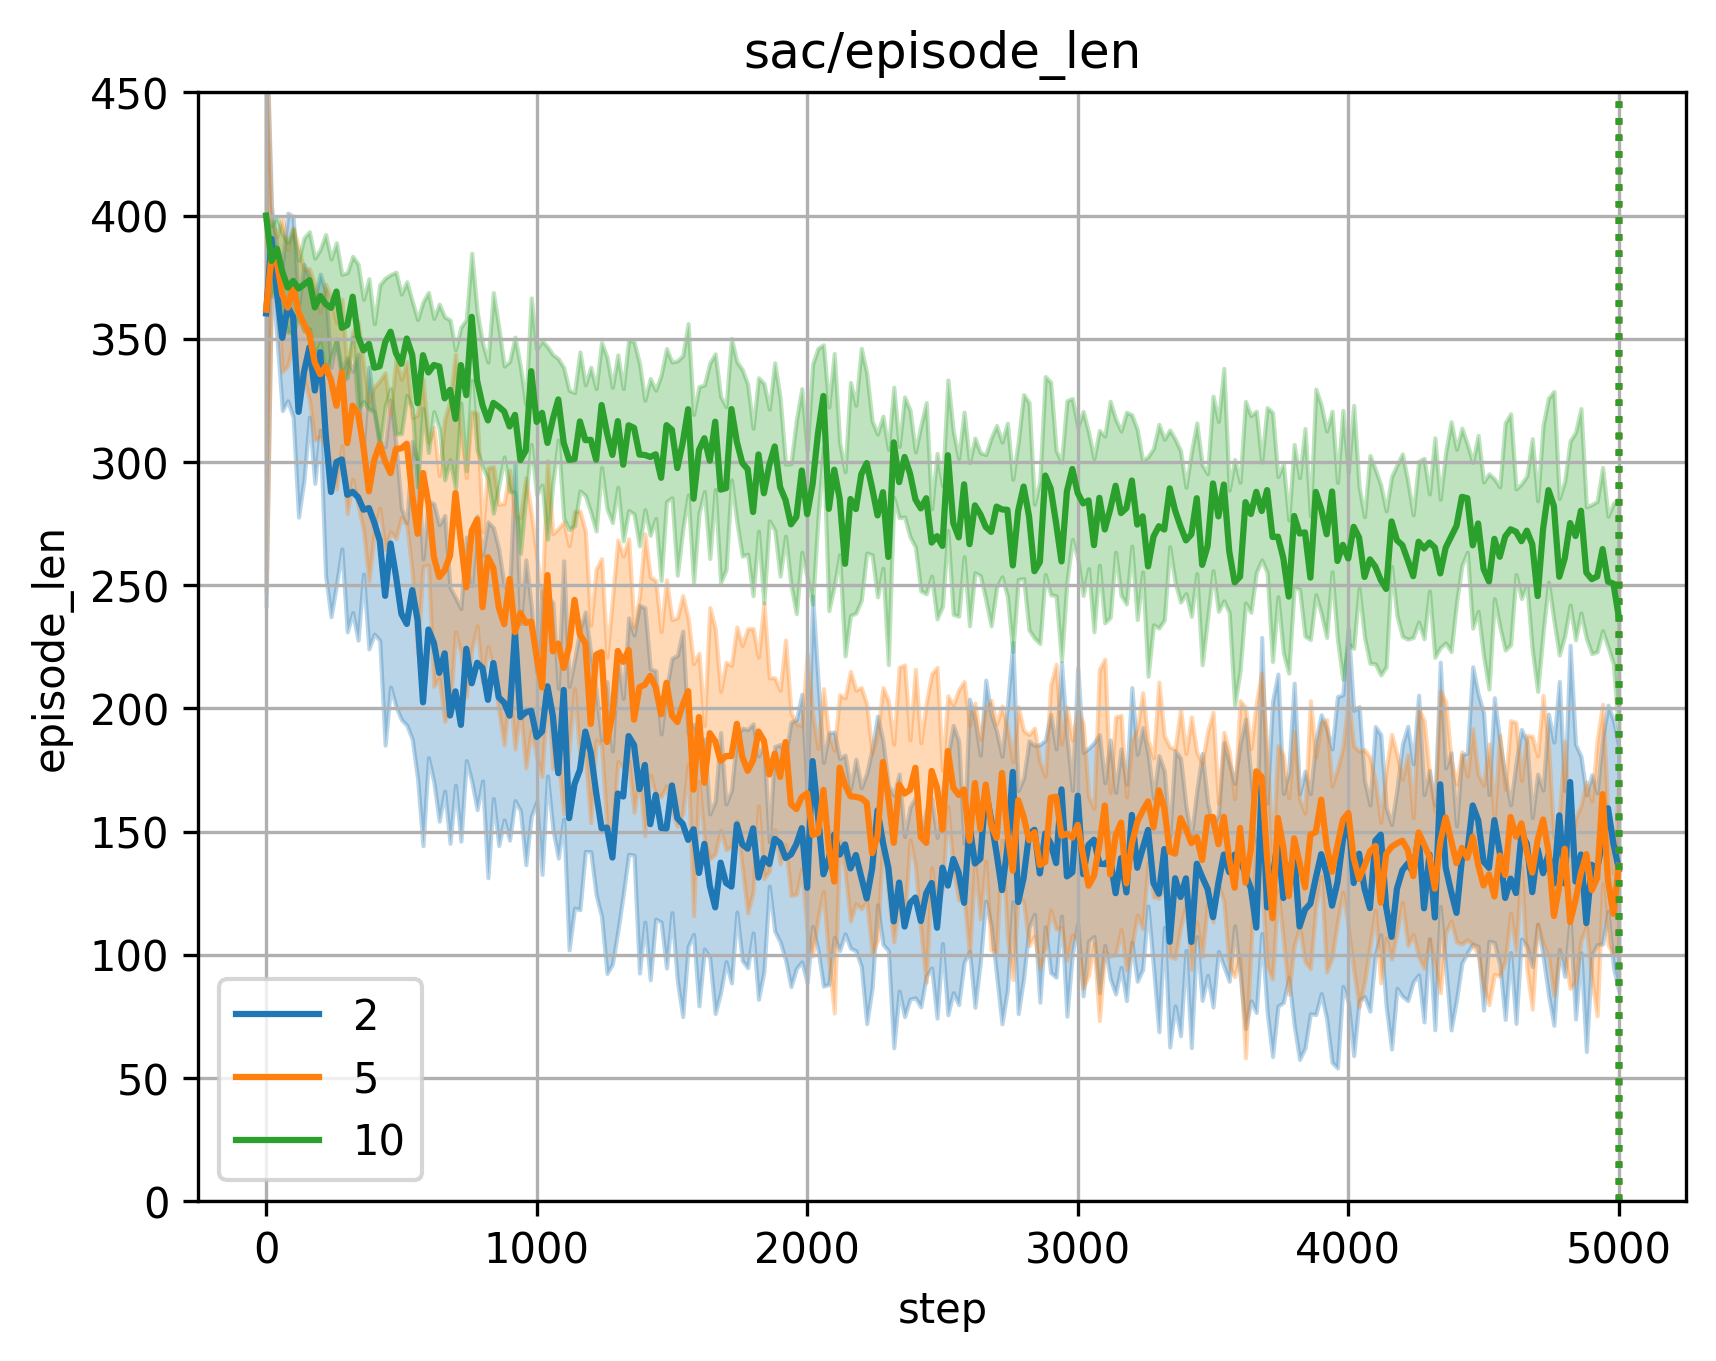

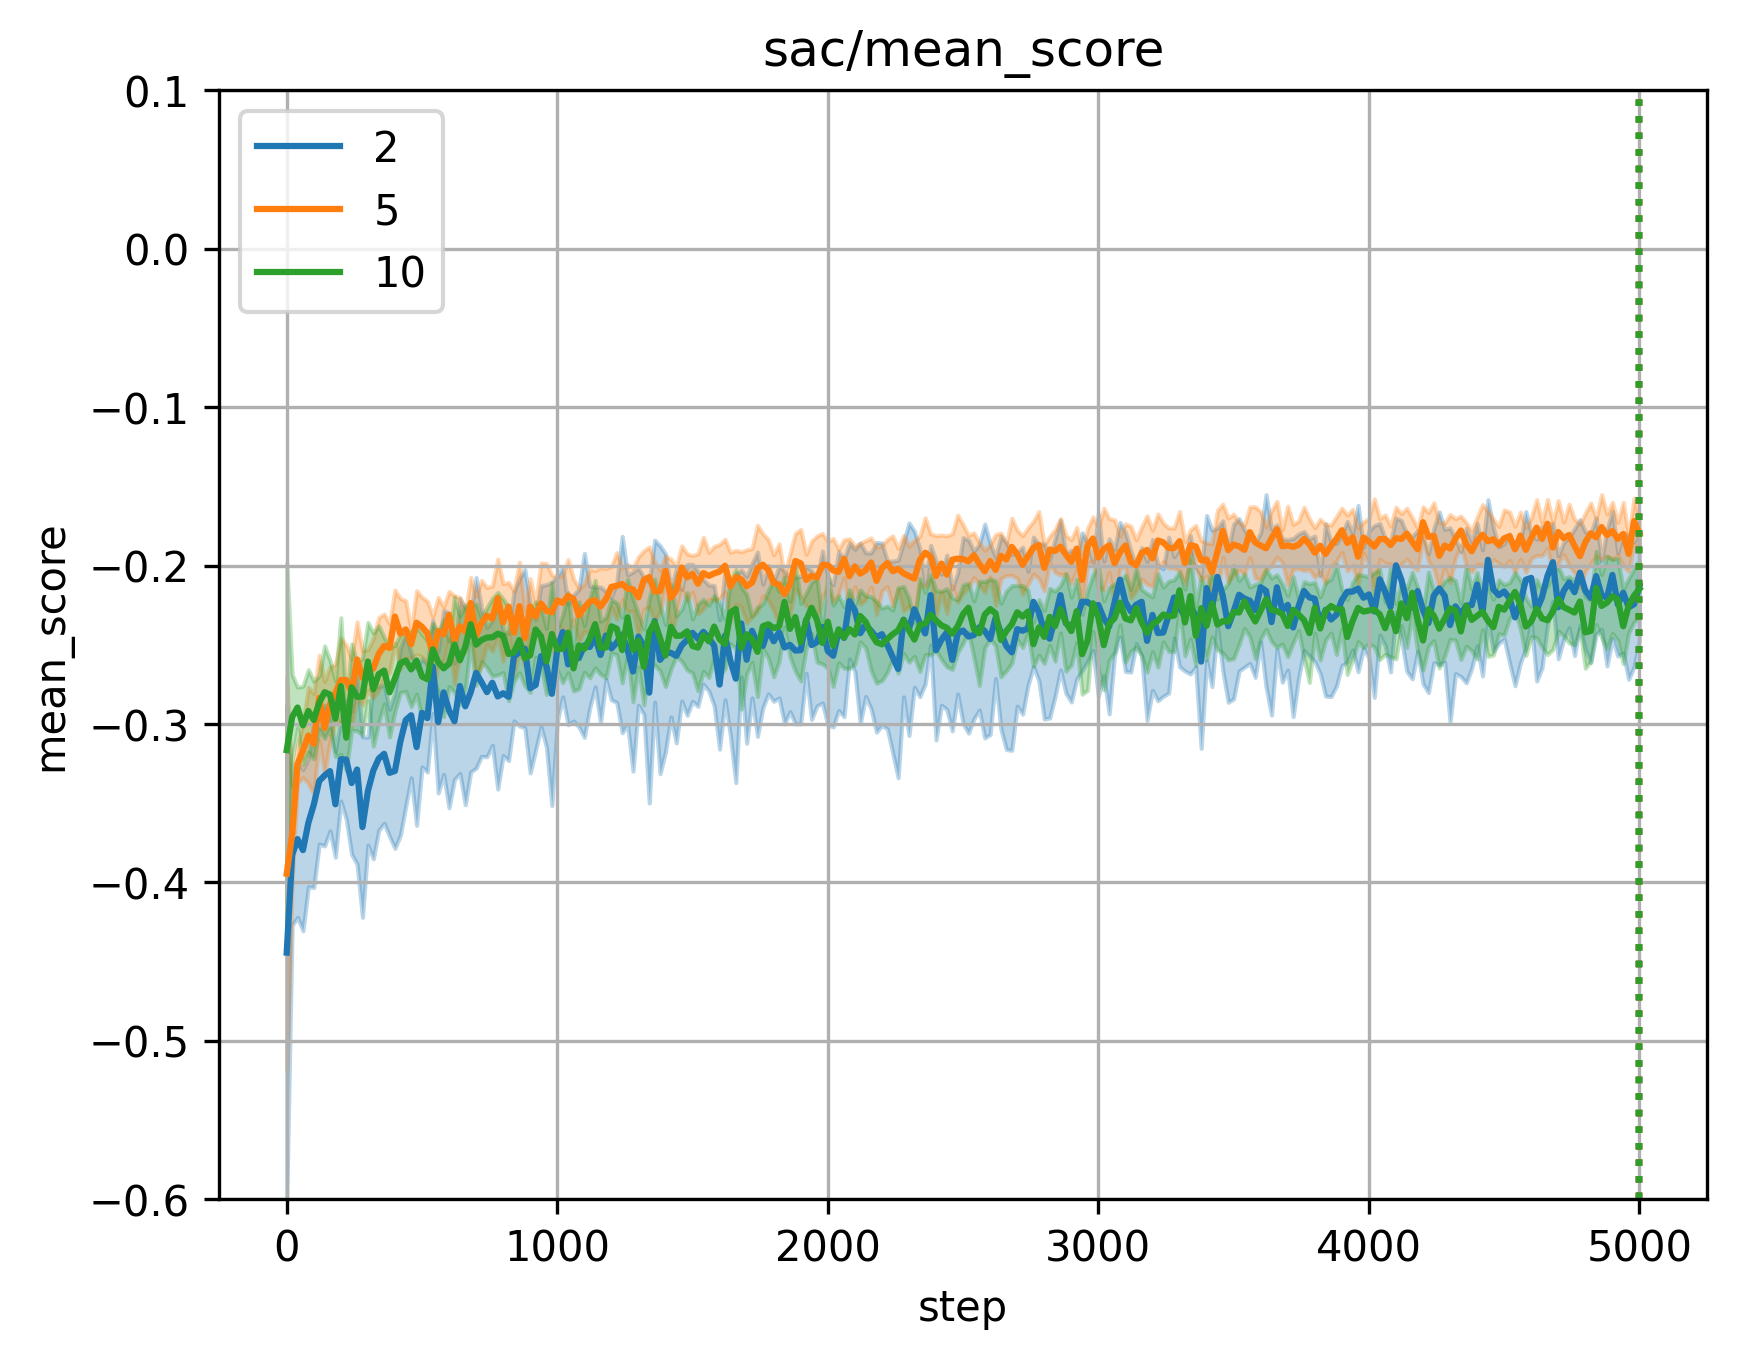

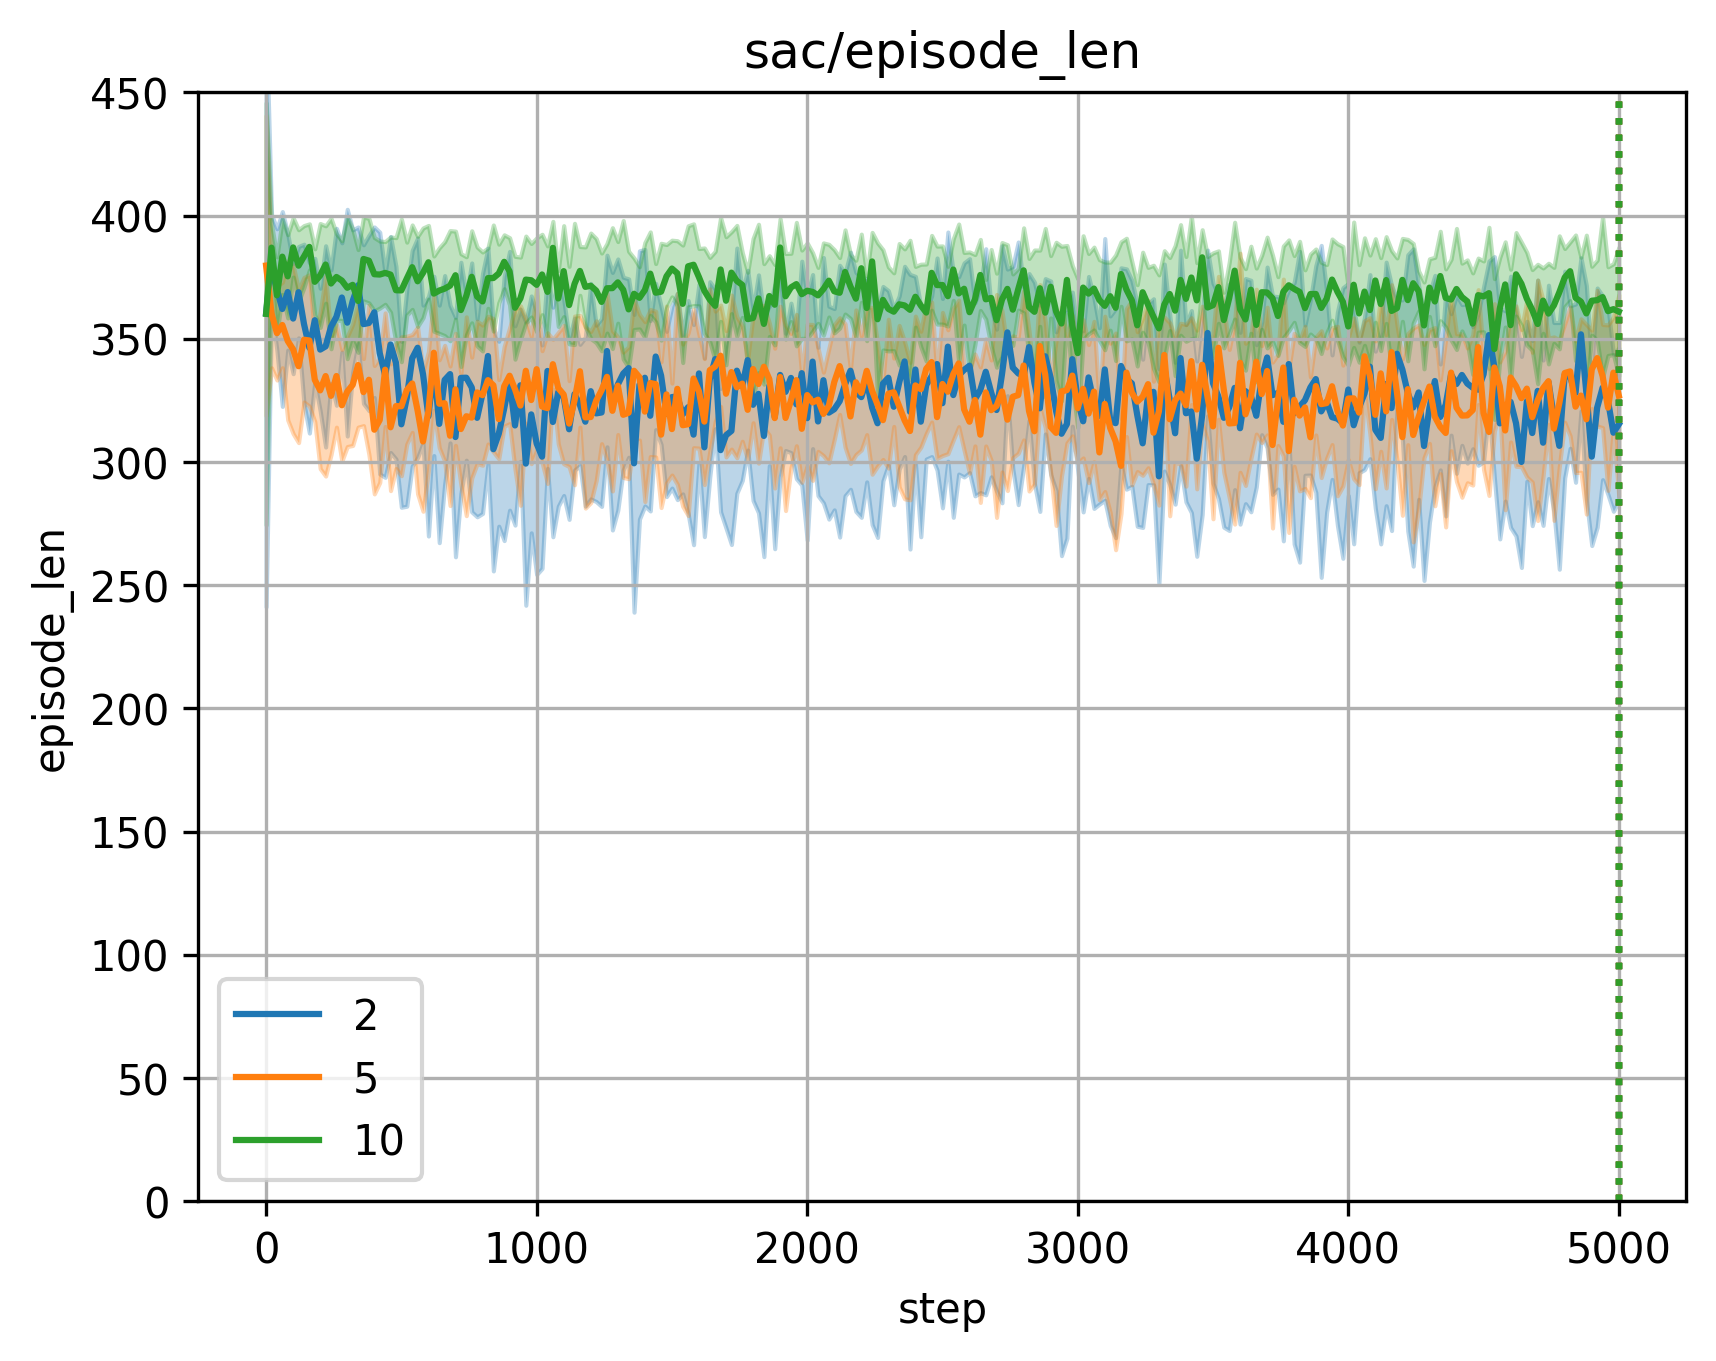

In [5]:
n_joints = [2, 5, 10]
fig, ax = plot_sac_comparison("sac/supervised_dist_loss", n_joints, "sac/mean_score", SCORE_LIMITS)
fig.savefig(FIGURE_PATH + f"sac_supervised_dist_{n_joints}_mean_score.png")

fig, ax = plot_sac_comparison("sac/supervised_dist_loss", n_joints, "sac/episode_len", EPISODE_LIMITS)
fig.savefig(FIGURE_PATH + f"sac_supervised_dist_{n_joints}_episode_len.png")

# plot_sac_comparison("sac/supervised_dist_loss", [2, 5], "sac/", )

n_joints = [2, 5, 10]
fig, ax = plot_sac_comparison("sac/supervised_imitation", n_joints, "sac/mean_score", SCORE_LIMITS)
fig.savefig(FIGURE_PATH + f"sac_supervised_imitation{n_joints}_mean_score.png")

fig, ax = plot_sac_comparison("sac/supervised_imitation", n_joints, "sac/episode_len", EPISODE_LIMITS)
fig.savefig(FIGURE_PATH + f"sac_supervised_imitation{n_joints}_episode_len.png")



# Additional Plots

In [15]:
fig, ax = plot_sac_comparison(
    "sac/latent_actor_4", [15], "sac/alpha_loss", [0, 6e33])
fig.savefig("../thesis/figures/appendix/alpha_loss_15.png")

plt.ioff()

In [4]:
acquire_curves()

TypeError: acquire_curves() missing 3 required positional arguments: 'dir', 'prefix', and 'key'